3.168334587944208


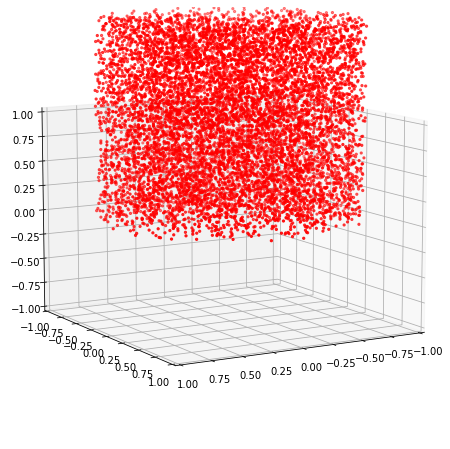

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy import stats
from mpl_toolkits.mplot3d import axes3d

def getRandomPoint():
    """
    Halla un punto aleatorio en un cilindro
    de radio < 1 y 0 < altura < 3
    """
    r = np.sqrt(np.random.rand())
    theta = np.radians(np.random.rand()*360)
    
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    z = np.random.rand()*2

    return x, y, z


def CreateSphere(Npoints, R):
    
    X = []
    Y = []
    Z = []
    
    for i in range(Npoints):
        
        phi = np.random.uniform( 0., 2*np.pi )
        
        costheta = np.random.uniform( -1, 1)
        theta = np.arccos(costheta)
        
        #theta = np.random.uniform( 0., np.pi )
        
        
        u = np.random.rand()
        
        r = R*u**(1./3.)

        punto = getRandomPoint()
        X = np.append( X, punto[0] )
        Y = np.append( Y, punto[1] )
        Z = np.append( Z, punto[2] )
        
    return X,Y,Z





Radio = 1.0
Npoints = 10000
data_sphere = CreateSphere(Npoints,Radio)
data_sphere = np.array(data_sphere)

#print(data_sphere)



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

ax.set_xlim3d(-Radio, Radio)
ax.set_ylim3d(-Radio, Radio)
ax.set_zlim3d(-Radio, Radio)

ax.view_init(10,60)
ax.scatter(data_sphere[0],data_sphere[1],data_sphere[2], color='r',marker='.')


def func(x,y,z):
    r = x**2 + y**2
    return r * z


def MCIntegral(data,Npoints,R):
    
    integral = 0.
    
    for i in range(Npoints):
        
        integral += func( data[0][i], data[1][i], data[2][i] )
        #print(func( data[0][i], data[1][i], data[2][i] ))
        
    volumen = 2*np.pi    # Volumen de normalizacion
        
    integral *= volumen/Npoints
    
    return integral




integral = MCIntegral(data_sphere,Npoints,Radio)

print(integral)

